In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
train = pd.read_csv('C:/dataset/dacon5_mnist/train.csv')
test = pd.read_csv('C:/dataset/dacon5_mnist/test.csv')

In [6]:
train.shape
test.shape

(2048, 787)

(20480, 786)

In [7]:
train.head()

,id,digit,letter,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,1,5,L,1,1,1,4,3,0,0,...,2,1,0,1,2,4,4,4,3,4
1,2,0,B,0,4,0,0,4,1,1,...,0,3,0,1,4,1,4,2,1,2
2,3,4,L,1,1,2,2,1,1,1,...,3,3,3,0,2,0,3,0,2,2
3,4,9,D,1,2,0,2,0,4,0,...,3,3,2,0,1,4,0,0,1,1
4,5,6,A,3,0,2,4,0,3,0,...,4,4,3,2,1,3,4,3,1,2


In [71]:
test.head()

,id,letter,0,1,2,3,4,5,6,7,...,774,775,776,777,778,779,780,781,782,783
0,2049,L,0,4,0,2,4,2,3,1,...,2,0,4,2,2,4,3,4,1,4
1,2050,C,4,1,4,0,1,1,0,2,...,0,3,2,4,2,4,2,2,1,2
2,2051,S,0,4,0,1,3,2,3,0,...,1,3,2,0,3,2,3,0,1,4
3,2052,K,2,1,3,3,3,4,3,0,...,3,0,3,2,4,1,0,4,4,4
4,2053,W,1,0,1,1,2,2,1,4,...,4,3,1,4,0,2,1,2,3,4


## EDA

Text(0.5, 1.0, 'Index: 5, Digit: 8, Letter: C')

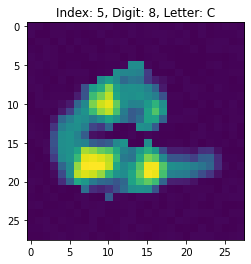

In [13]:
idx = 5
img = train.loc[idx, '0':].values.reshape(28, 28).astype(int)
digit = train.loc[idx, 'digit']
letter = train.loc[idx, 'letter']

plt.title('Index: %i, Digit: %s, Letter: %s'%(idx, digit, letter))
plt.imshow(img)
plt.show()

## Train model

In [36]:
x_train = train.drop(['id', 'digit', 'letter'], axis=1).values
x_train

array([[1, 1, 1, ..., 4, 3, 4],
       [0, 4, 0, ..., 2, 1, 2],
       [1, 1, 2, ..., 0, 2, 2],
       ...,
       [4, 0, 4, ..., 2, 0, 0],
       [2, 3, 3, ..., 4, 3, 1],
       [4, 2, 2, ..., 4, 3, 4]], dtype=int64)

In [37]:
x_train = x_train.reshape(-1, 28, 28, 1)/255

In [38]:
y = train['digit']
y_train = np.zeros((len(y), len(y.unique())))  ## 2048*10
for i, digit in enumerate(y):
    y_train[i, digit] = 1

In [39]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [63]:
'''
yy = y.values.reshape(-1, 1)

from sklearn.preprocessing import OneHotEncoder
e = OneHotEncoder()
e.fit(yy)

y_class = e.transform(yy).toarray()
y_class
'''

OneHotEncoder()

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import ModelCheckpoint,EarlyStopping

In [41]:
model = Sequential()
model.add(Conv2D(128, kernel_size=5, input_shape=(28, 28, 1), strides=1, padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, 2, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
model.add(Conv2D(256, 2, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, 2, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(1000,  activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [42]:
# 모델의 실행
model.fit(x_train, y_train, epochs=20, verbose=1)

Epoch 1/20
64/64 [==============================] - 39s 609ms/step - loss: 2.7002 - accuracy: 0.4067
Epoch 2/20
64/64 [==============================] - 42s 663ms/step - loss: 0.9646 - accuracy: 0.6807
Epoch 3/20
64/64 [==============================] - 40s 629ms/step - loss: 0.5452 - accuracy: 0.8081
Epoch 4/20
64/64 [==============================] - 38s 595ms/step - loss: 0.3473 - accuracy: 0.8853
Epoch 5/20
64/64 [==============================] - 37s 579ms/step - loss: 0.2755 - accuracy: 0.9004
Epoch 6/20
64/64 [==============================] - 39s 616ms/step - loss: 0.1392 - accuracy: 0.9609
Epoch 7/20
64/64 [==============================] - 40s 628ms/step - loss: 0.1177 - accuracy: 0.9619
Epoch 8/20
64/64 [==============================] - 41s 635ms/step - loss: 0.0913 - accuracy: 0.9722
Epoch 9/20
64/64 [==============================] - 39s 603ms/step - loss: 0.0535 - accuracy: 0.9829
Epoch 10/20
64/64 [==============================] - 40s 624ms/step - loss: 0.0478 - accura

In [46]:
from keras.models import load_model

model.save('./model/baseline_model.h5')  # 모델을 컴퓨터에 저장

## Predict

In [47]:
x_test = test.drop(['id', 'letter'], axis=1).values
x_test = x_test.reshape(-1, 28, 28, 1)
x_test = x_test/255

In [48]:
submission = pd.read_csv('C:/dataset/dacon5_mnist/submission.csv')
submission['digit'] = np.argmax(model.predict(x_test), axis=1)
submission.head()

,id,digit
0,2049,6
1,2050,9
2,2051,6
3,2052,0
4,2053,3


In [49]:
submission.to_csv('baseline.csv', index=False)

In [ ]:
## 제출 점수 : 0.7598

## try

In [57]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler

In [50]:
train = pd.read_csv('C:/dataset/dacon5_mnist/train.csv')
test = pd.read_csv('C:/dataset/dacon5_mnist/test.csv')

In [51]:
x_train = train.drop(['id', 'digit', 'letter'], axis=1).values.reshape(-1, 28, 28, 1)/255

In [55]:
y_train = to_categorical(train['digit'].values)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [58]:
# 데이터 증강
datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.10,  
        width_shift_range=0.1, 
        height_shift_range=0.1)

In [59]:
model = Sequential()
model.add(Conv2D(128, kernel_size=5, input_shape=(28, 28, 1), strides=1, padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, 2, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
model.add(Conv2D(256, 2, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, 2, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(1000,  activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [60]:
# learning rate 조정
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)

## learning rate를 직접 설정하기 보다 epoch의 정도나 epoch의 조건에 따라 learning rate를 자동으로 조절하여 학습시키는 방법

In [62]:
epochs = 45
# Train-Test를 9:1로 분리
X_train2, X_val2, y_train2, y_val2 = train_test_split(
    x_train, y_train, test_size = 0.1)

history = model.fit_generator(
    datagen.flow(X_train2, y_train2, batch_size=32),
    epochs=epochs, 
    steps_per_epoch=X_train2.shape[0]//32,
    validation_data=(X_val2, y_val2), 
    callbacks=[annealer], 
    verbose=1
)
print(
    f"CNN: Epochs={epochs:d}, " +
    f"Train accuracy={max(history.history['acc']):.5f}, " +
    f"Validation accuracy={max(history.history['val_acc']):.5f}"
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/45
57/57 [==============================] - 36s 637ms/step - loss: 3.3321 - accuracy: 0.2634 - val_loss: 4.5641 - val_accuracy: 0.1024 - lr: 0.0010
Epoch 2/45
57/57 [==============================] - 36s 634ms/step - loss: 1.9005 - accuracy: 0.4025 - val_loss: 7.5602 - val_accuracy: 0.1024 - lr: 9.5000e-04
Epoch 3/45
57/57 [==============================] - 36s 636ms/step - loss: 1.6319 - accuracy: 0.4583 - val_loss: 10.5743 - val_accuracy: 0.1024 - lr: 9.0250e-04
Epoch 4/45
57/57 [==============================] - 34s 602ms/step - loss: 1.4616 - accuracy: 0.5202 - val_loss: 12.4324 - val_accuracy: 0.1024 - lr: 8.5737e-04
Epoch 5/45
57/57 [==============================] - 36s 640ms/step - loss: 1.3365 - accuracy: 0.5422 - val_loss: 11.6917 - val_accuracy: 0.1024 - lr: 8.1451e-04
Epoch 6/45
57/57 [==============================] - 37s 646ms/step - loss: 1.2370 - accuracy: 0.5969 - val_loss: 10.8340 - va

KeyError: 'acc'

In [63]:
model.save('./model/baseline_mymodel.h5')  # 모델을 컴퓨터에 저장

In [64]:
x_test = test.drop(['id', 'letter'], axis=1).values
x_test = x_test.reshape(-1, 28, 28, 1)
x_test = x_test/255

In [65]:
submission = pd.read_csv('C:/dataset/dacon5_mnist/submission.csv')
submission['digit'] = np.argmax(model.predict(x_test), axis=1)
submission.head()

,id,digit
0,2049,6
1,2050,9
2,2051,2
3,2052,0
4,2053,3


In [66]:
submission.to_csv('baseline_try01.csv', index=False)

In [ ]:
## 0.7745